# Create Distance Infographic - Cosmic Explorer Trade Study 

This Notebook reads from the output of Bayesian inference runs and creates a distance infographic for measuring the parameters of a CBC signal to within 10% accuracy.

### Import modules

In [1]:
import numpy
import matplotlib.pyplot as plt
from matplotlib import rcParams
import json
from matplotlib.patches import Patch
import seaborn as sns
from glob import glob
import collections
import math
import matplotlib.patches as mpatches

# plt.style.use('dark_background')
%matplotlib inline


In [2]:
from matplotlib import rcParams
rcParams["font.family"] = "serif"
rcParams["font.serif"] = "STIX"
rcParams["mathtext.fontset"] = "stix"

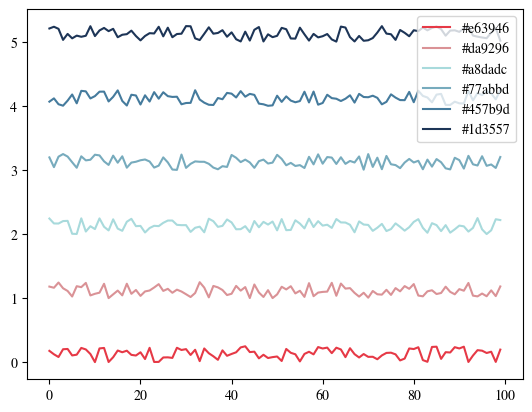

In [3]:
c_palette_list = ['#e63946', '#da9296', '#a8dadc', '#77abbd', '#457b9d', '#1d3557']
x = numpy.array(range(100)) 
for ii in range(len(c_palette_list)):
    plt.plot(x, ii + numpy.random.rand(100)*0.25, 
             color=c_palette_list[ii], label=c_palette_list[ii])
plt.legend()

### Data 

In [7]:
color_dict = {'A# (HLI)':c_palette_list[0], 
              'CE+2A#':c_palette_list[5]}


label_dict = {"BNS-z-2": r"Detect 1000 BNS mergers for z > 2",
              "BNS-z-5": r"Detect 1000 BNS mergers for z > 5",
              "BBH-z-2": r"Detect 1000 BNS mergers for z > 2",
              "BBH-z-5": r"Detect 1000 BNS mergers for z > 5",
              
              "NS-radius": r"Constrain NS radius to within 20 m",
              "BNS-high-SNR": r"Detect 500 BNS mergers with SNR > 100",
              "sky-loc": r"Locate $100$ BNS mergers within 1 sq. deg.",
              "GRB-id": r"Mapping 100 GRBs to progenitors",
              "early-detection": r"Detect $100$ BNS mergers 5 mins before merger",
              
              "postmerger": r"Detect 5 sources with postmerger SNR > 15",
              "continuous-waves": r"Detect 10 sources for contunious waves",
              
              "H0": r"Measure $H_0$ to within $1\%$",
              "BH-postinspiral": r"1000 BBH with post-inspiral SNR > 100",
              
              
#               "Omega": r"Measure $\sigma_{\Omega_m} <0.05$",
#               "GR": r"Precision measurement of GR",
#               "BH-mass-spectrum": r"Measure BH mass spectrum",
#               "NS-mass-spectrum": r"Measure NS mass spectrum",
             }


input_data = [
#-------# SECTION 1 : BHs and NSs Throughout Cosmic Time #-------#
{"Name": "BNS-z-2", "A# (HLI)": 30, "CE+2A#": 3},
    
{"Name": "BNS-z-5", "A# (HLI)": 30, "CE+2A#": 3},
    
{"Name": "BBH-z-2", "A# (HLI)": 30, "CE+2A#": 3},
    
{"Name": "BBH-z-5", "A# (HLI)": 30, "CE+2A#": 3},
    
#-------# SECTION 2 : MMA and Dynamics of Dense Matter #-------#
    
{"Name": "NS-radius", "A# (HLI)": 30, "CE+2A#": 3},

{"Name": "BNS-high-SNR", "A# (HLI)": 166, "CE+2A#": 2.7},
    
# Table 15 of https://www.overleaf.com/project/645839ccec69020003928e71    
{"Name": "sky-loc", "A# (HLI)": 20, "CE+2A#": 5.5},
    
{"Name": "GRB-id", "A# (HLI)": 166, "CE+2A#": 2.7}, ## of NS-NS at z > 2 with ∆Ω ≤ 100 deg2

# Fig 4 of https://iopscience.iop.org/article/10.3847/2041-8213/ac1a75/pdf (CE+2A# network), and
# Fig 4 of https://iopscience.iop.org/article/10.3847/2041-8213/abbc10/pdf (A# network), 
{"Name": "early-detection", "A# (HLI)": 23, "CE+2A#": 1},

#-------# SECTION 3 : New Probes of Extreme Astrophysics #-------#
{"Name": "postmerger", "A# (HLI)": 200, "CE+2A#": 2},
    
{"Name": "continuous-waves", "A# (HLI)": 200, "CE+2A#": 2},
    
#-------# SECTION 4: Fundamental Physics and Precision Cosmology #-------#

{"Name": "BH-postinspiral", "A# (HLI)": 166, "CE+2A#": 1},    
    
{"Name": "H0", "A# (HLI)": 8, "CE+2A#": 1},
     

]

In [8]:
def plot_dist_bar(network_dict, nw_number):
    '''
    Evaluates the x-ranges for the broken bar for
    each parameter from the dictionary values. Plots 
    the broken bars for each parameter.
    
    Parameters
    ----------
    network_dict: dictionary
        Dictionary with the disctance values
    
    nw_number: int
        Number id for the detctor network
    '''
    
    sorted_dict = {x: network_dict[x] for x in network_dict if x not in ["Name"]}
    sorted_dict = collections.OrderedDict(sorted(sorted_dict.items(), key=lambda x: x[1], reverse=True))
    for key in sorted_dict.keys():
        if sorted_dict[key]!= 0:
            p = ax.barh(10*nw_number, sorted_dict[key], left=0, height = 5, 
                        color=color_dict[key], alpha = 1)

### Plotting the timelines

plotting times for H0
plotting times for BH-postinspiral
plotting times for continuous-waves
plotting times for postmerger
plotting times for early-detection
plotting times for GRB-id
plotting times for sky-loc
plotting times for BNS-high-SNR
plotting times for NS-radius
plotting times for BBH-z-5
plotting times for BBH-z-2
plotting times for BNS-z-5
plotting times for BNS-z-2
[<matplotlib.patches.Patch object at 0x7f425753b8e0>, <matplotlib.patches.Patch object at 0x7f424c83f7f0>, <matplotlib.patches.Patch object at 0x7f425428bee0>]


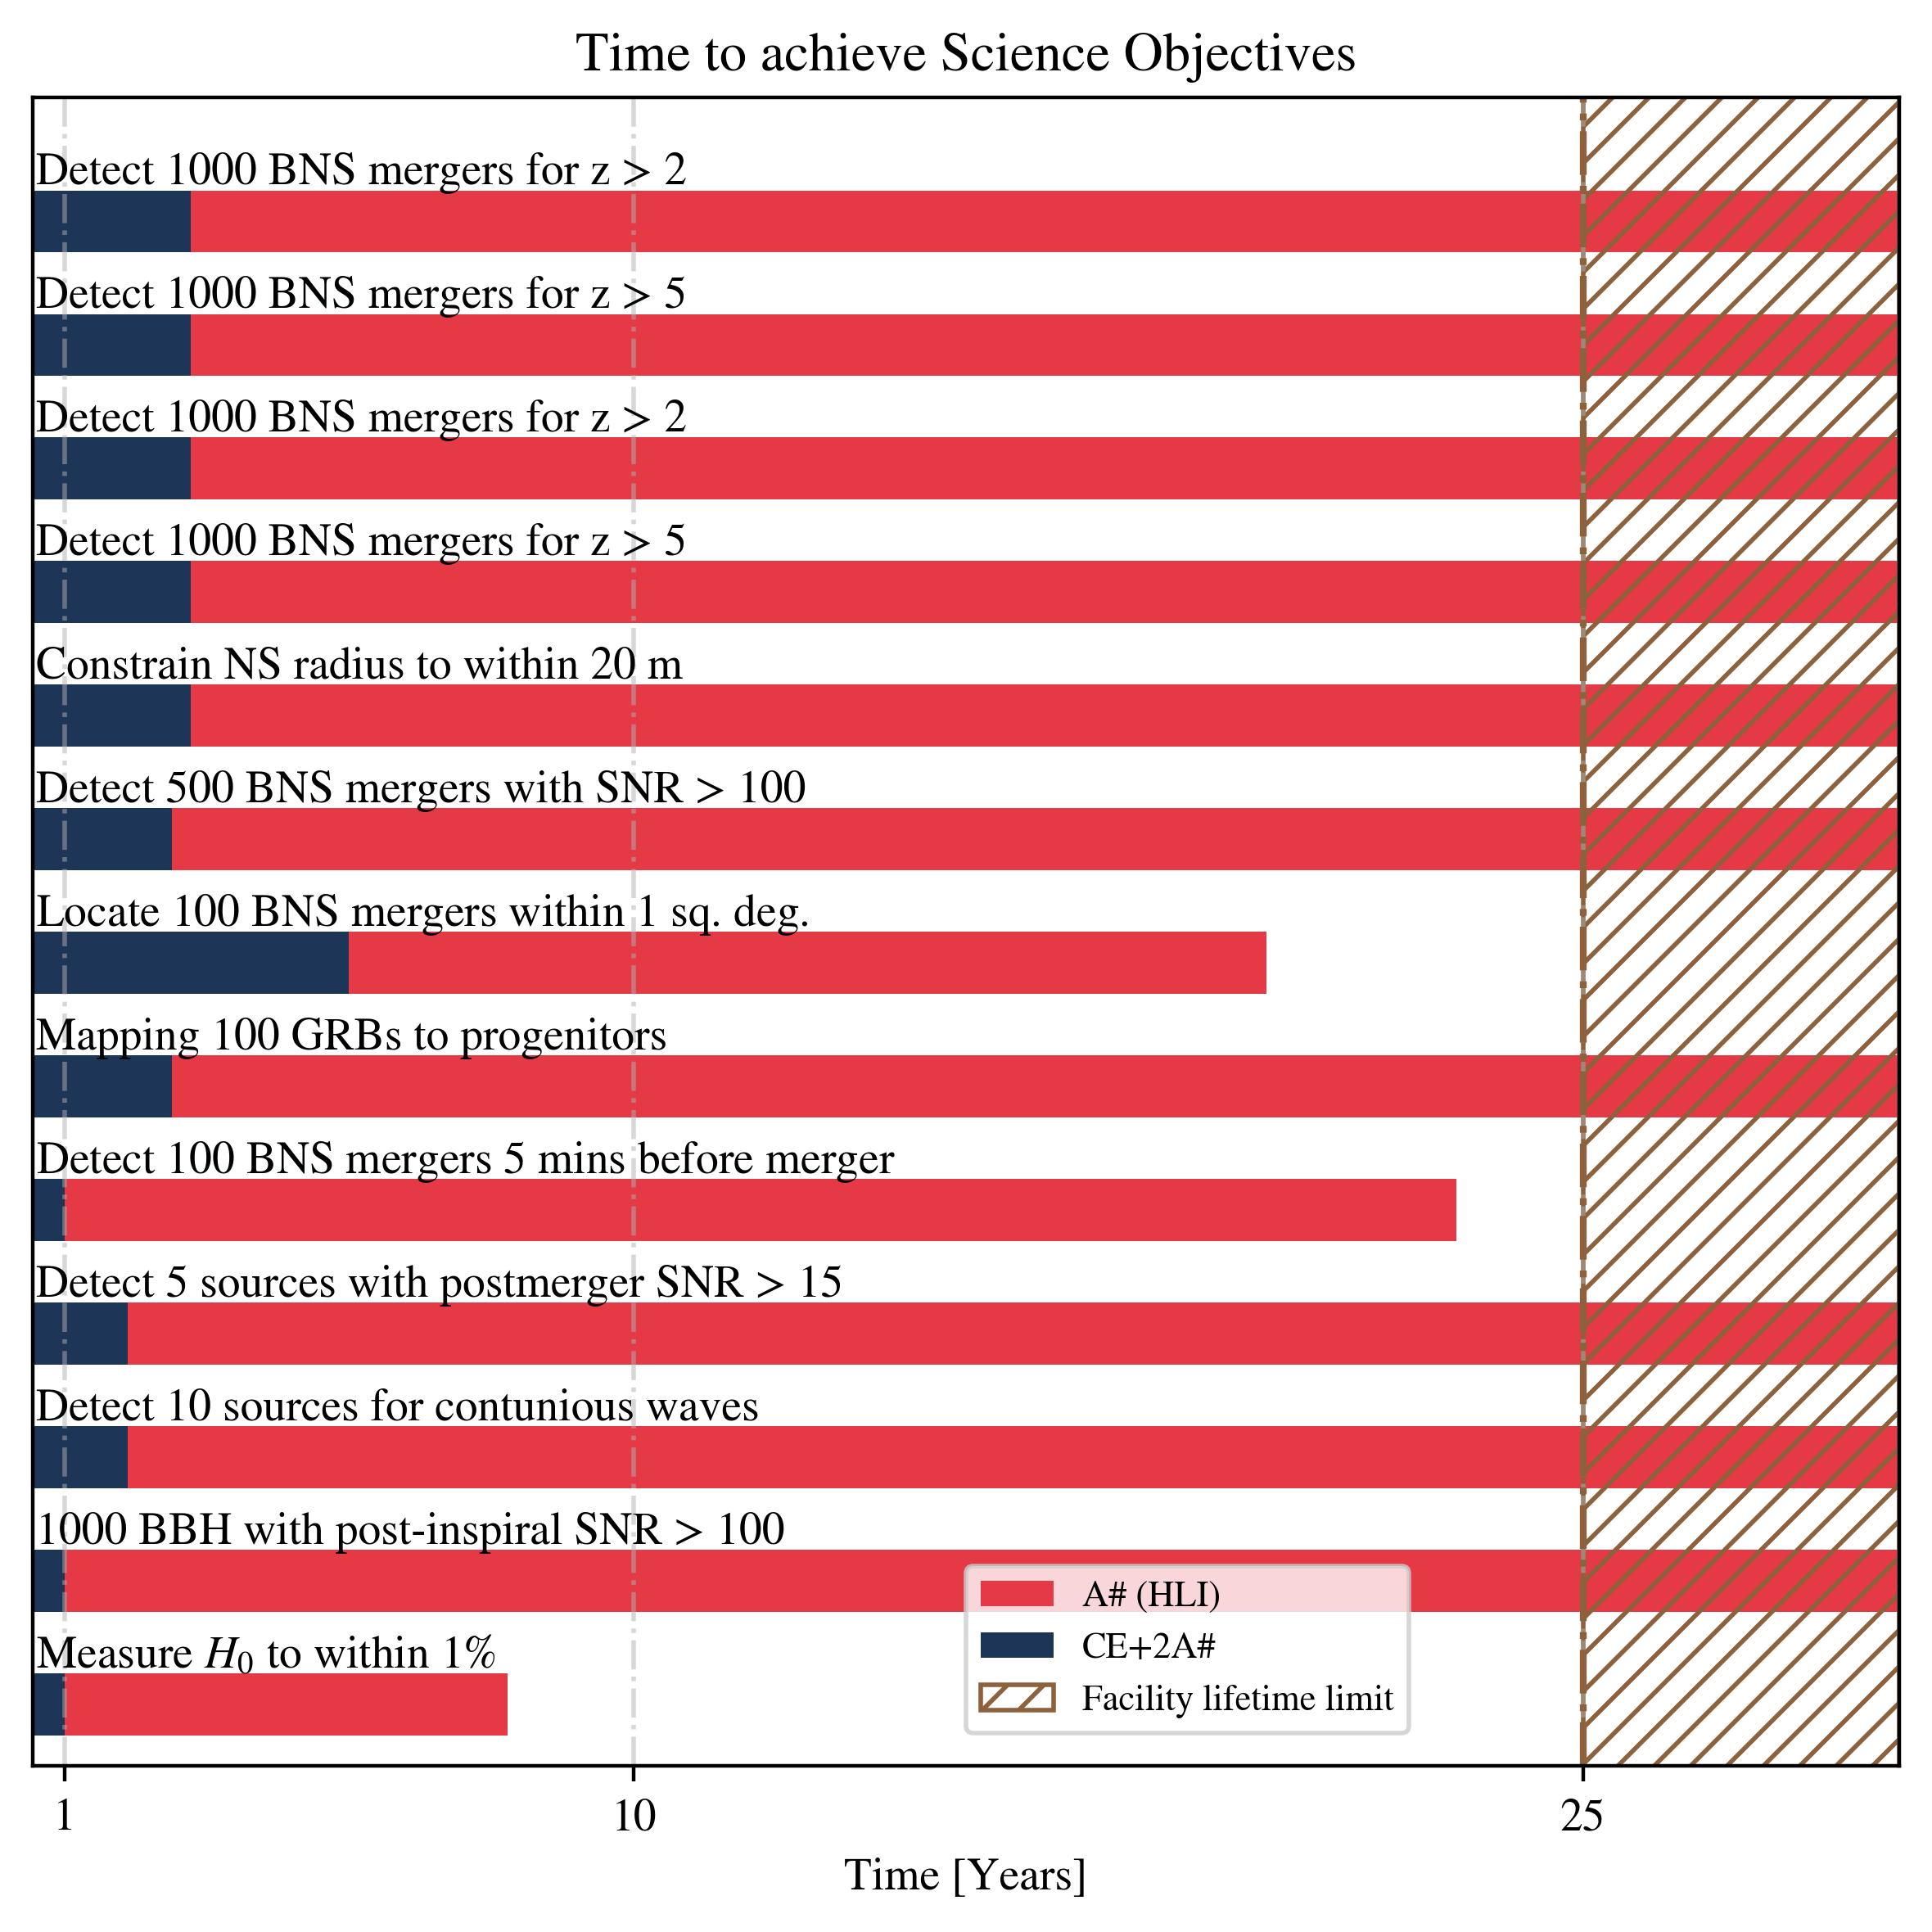

In [11]:

# initiate a list of names for the detector networks
name_list = []

fig, ax = plt.subplots(figsize=(6, 6), dpi=400)

for ii in range(len(input_data)):
#     print(input_data[-ii])
    nw_dict = input_data[-ii-1]
    name = nw_dict['Name']
    print('plotting times for {}'.format(name))
    name_list.append(name)
    plot_dist_bar(nw_dict, ii+1)
    plt.text(0.55, 3+(10*(ii+1)), label_dict[name])

ax.set_ylim(5, len(input_data)*10+10)

ax.set_xlabel('Time [Years]')
ax.set_xticks([1, 10, 25])
ax.set_yticks([])

legend_elements = [Patch(facecolor=color_dict[key], 
                         label=key) for key in color_dict.keys()]



# plt.xscale('log')
upper_lim = 30
ax.set_xlim(0.5, upper_lim)

# Facility time vertical line
facility_lim = 25.
fc = sns.color_palette("muted")[5]
plt.axvline(facility_lim, linestyle="-.", c=fc)

plt.fill_between(numpy.linspace(facility_lim, upper_lim, 100),
                 numpy.ones(100)*150,
                 color=fc,hatch="///", fc="none")

facility_limit_patch = mpatches.Patch(facecolor='none', edgecolor=fc, 
                                      hatch='///', label='Facility lifetime limit')
legend_elements.append(facility_limit_patch)


print(legend_elements)
# ax.legend(handles=legend_elements, loc='lower center', fontsize=8)
ax.legend(handles=legend_elements, loc=(0.5, 0.02), fontsize=8)
plt.grid(which='major', axis='x', linestyle='-.', linewidth=1, alpha=0.5)
plt.title('Time to achieve Science Objectives')
plt.tight_layout()
plt.savefig('time-to-deliver-science.pdf')
plt.show()

In [ ]:
# input_data = [
# {"Name": "NS-radius", "A# (HLI)": 26, "CE-20": 0, "CE-40": 1, 
#  "CE-40 + A# (HLI)": 0, "CE-40 + CE-20": 0, "CE-40 + CE-40": 0},

# # Sky localizationa nd eraly detection data taken from 
# # Fig 1 and Fig 4 of https://iopscience.iop.org/article/10.3847/2041-8213/ac1a75/pdf
# {"Name": "sky-loc", "A# (HLI)": 23, "CE-20": 0, "CE-40": 4, 
#  "CE-40 + A# (HLI)": 0, "CE-40 + CE-20": 0, "CE-40 + CE-40": 0},
    
# {"Name": "sky-loc-2", "A# (HLI)": 50, "CE-20": 0, "CE-40": 8, 
#  "CE-40 + A# (HLI)": 0, "CE-40 + CE-20": 0, "CE-40 + CE-40": 0},
    
# {"Name": "GRB-id", "A# (HLI)": 100, "CE-20": 0, "CE-40": 2.8, 
#  "CE-40 + A# (HLI)": 0, "CE-40 + CE-20": 0, "CE-40 + CE-40": 0},
    
# {"Name": "early-detection", "A# (HLI)": 23, "CE-20": 0, "CE-40": 1, 
#  "CE-40 + A# (HLI)": 0, "CE-40 + CE-20": 0, "CE-40 + CE-40": 0},

# # Cosmological measurement data is taken from Table 1 of https://arxiv.org/pdf/2011.01211.pdf and
# # from https://arxiv.org/pdf/1712.06531.pdf
# {"Name": "BH-postinspiral", "A# (HLI)": 166, "CE-20": 0, "CE-40": 1, 
#  "CE-40 + A# (HLI)": 0, "CE-40 + CE-20": 0, "CE-40 + CE-40": 0},    
    
# {"Name": "H0", "A# (HLI)": 8, "CE-20": 0, "CE-40": 1, 
#  "CE-40 + A# (HLI)": 0, "CE-40 + CE-20": 0, "CE-40 + CE-40": 0},
    
# {"Name": "Omega", "A# (HLI)": 10, "CE-20": 0, "CE-40": 2, 
#  "CE-40 + A# (HLI)": 0, "CE-40 + CE-20": 0, "CE-40 + CE-40": 0}, 

 
    
# # Waiting for Table 2 to be filled in to get the data for the following three science goals
# # {"Name": "GR", "A# (HLI)": 33, "CE-20": 0, "CE-40": 1, 
# #  "CE-40 + A# (HLI)": 0, "CE-40 + CE-20": 0, "CE-40 + CE-40": 0.5},
    
# # {"Name": "BH-mass-spectrum", "A# (HLI)": 33, "CE-20": 0, "CE-40": 1, 
# #  "CE-40 + A# (HLI)": 0, "CE-40 + CE-20": 0, "CE-40 + CE-40": 0.5},
    
# #     {"Name": "NS-mass-spectrum", "A# (HLI)": 33, "CE-20": 0, "CE-40": 1, 
# #  "CE-40 + A# (HLI)": 0, "CE-40 + CE-20": 0, "CE-40 + CE-40": 0.5},

# ]